In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
data = pd.read_csv("Electric_Production.csv",index_col=0)
data.head()

,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [3]:
# We now convert this data into a time series data. Currently the date values are stored as string type.

In [4]:
data.index

Index(['1939-01-01', '1939-02-01', '1939-03-01', '1939-04-01', '1939-05-01',
       '1939-06-01', '1939-07-01', '1939-08-01', '1939-09-01', '1939-10-01',
       ...
       '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01',
       '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01'],
      dtype='object', name='DATE', length=954)

In [5]:
data.index = pd.to_datetime(data.index)


In [6]:
data.head()


,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [7]:
data.index


DatetimeIndex(['1939-01-01', '1939-02-01', '1939-03-01', '1939-04-01',
               '1939-05-01', '1939-06-01', '1939-07-01', '1939-08-01',
               '1939-09-01', '1939-10-01',
               ...
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01'],
              dtype='datetime64[ns]', name='DATE', length=954, freq=None)

In [8]:
# Check for missing data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 954 entries, 1939-01-01 to 2018-06-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  954 non-null    float64
dtypes: float64(1)
memory usage: 14.9 KB


In [10]:
# Rename column for ease

In [12]:
data.columns = ['energy_prod']


In [13]:
data.head()


,energy_prod
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid



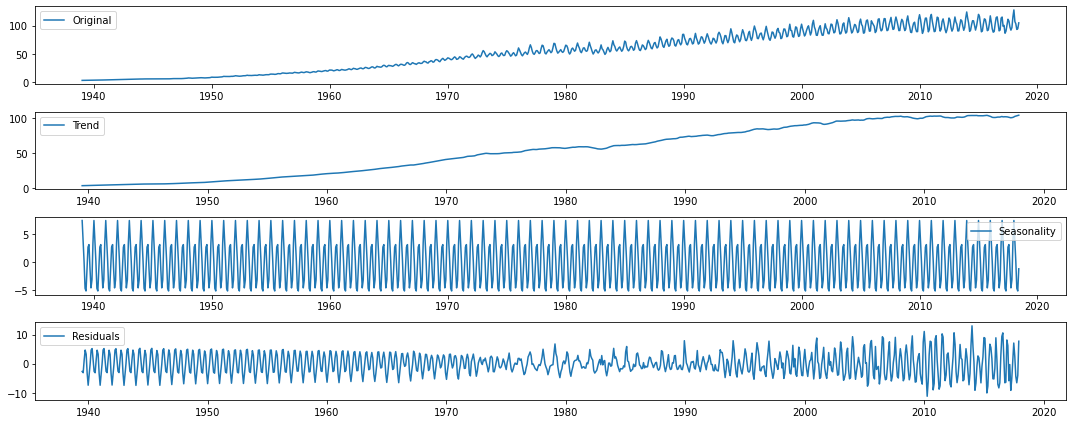

In [15]:
plt.subplot(411)
plt.plot(data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [1]:
!pip install pmdarima

  Using cached pmdarima-1.8.2-cp38-cp38-win_amd64.whl (596 kB)


In [16]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3729.023, Time=1.48 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4226.662, Time=0.17 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4048.141, Time=0.48 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3850.307, Time=0.69 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.61 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=3728.477, Time=1.78 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=3890.232, Time=1.47 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=3705.062, Time=4.81 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=3775.519, Time=3.64 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=3690.617, Time=12.47 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=3722.200, Time=8.06 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=3789.730, Time=9.73 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=3832.019, Time=11.50 sec
 ARIMA(2,1,1)(2,1,2)[12]             : AIC=3690.547, Time=13.94 sec
 ARIMA(2,1,1)(1,1,2)[

In [17]:
stepwise_model.aic()


3687.4803483148885

In [18]:
# Convert data to stationary time series

data2 = np.log(data)

In [19]:
# Train Test Split Data

In [20]:
data2.head()


,energy_prod
DATE,
1939-01-01,1.219118
1939-02-01,1.226712
1939-03-01,1.249185
1939-04-01,1.256556
1939-05-01,1.256556


In [21]:
data2.tail()

,energy_prod
DATE,
2018-02-01,4.672881
2018-03-01,4.638972
2018-04-01,4.534820
2018-05-01,4.548848
2018-06-01,4.652571


In [22]:
train = data2.loc['1939-01-01':'2016-12-01']
test = data2.loc['2016-01-01':]

In [23]:
train.tail()


,energy_prod
DATE,
2016-08-01,4.749101
2016-09-01,4.626763
2016-10-01,4.507477
2016-11-01,4.524756
2016-12-01,4.729683


In [24]:
test.head()


,energy_prod
DATE,
2016-01-01,4.763991
2016-02-01,4.665832
2016-03-01,4.548298
2016-04-01,4.481619
2016-05-01,4.495620


In [25]:
test.tail()


,energy_prod
DATE,
2018-02-01,4.672881
2018-03-01,4.638972
2018-04-01,4.534820
2018-05-01,4.548848
2018-06-01,4.652571


In [26]:
len(test)


30

In [27]:
stepwise_model.fit(train)


ARIMA(order=(3, 1, 1), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [28]:
future_forecast = stepwise_model.predict(n_periods=30)


In [29]:
future_forecast


array([4.82763827, 4.73027496, 4.6233407 , 4.51416465, 4.53330977,
       4.6579167 , 4.74868744, 4.74743713, 4.64107008, 4.54063594,
       4.57303572, 4.72788573, 4.82132527, 4.73813325, 4.64103111,
       4.52834744, 4.54711161, 4.6684231 , 4.75751275, 4.75442013,
       4.65072127, 4.55190457, 4.58494984, 4.73264009, 4.8272828 ,
       4.74459855, 4.64778092, 4.53694647, 4.55548585, 4.67735907])

In [30]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])

future_forecast.head()


,Prediction
DATE,
2016-01-01,4.827638
2016-02-01,4.730275
2016-03-01,4.623341
2016-04-01,4.514165
2016-05-01,4.533310


In [31]:
test.head()


,energy_prod
DATE,
2016-01-01,4.763991
2016-02-01,4.665832
2016-03-01,4.548298
2016-04-01,4.481619
2016-05-01,4.495620


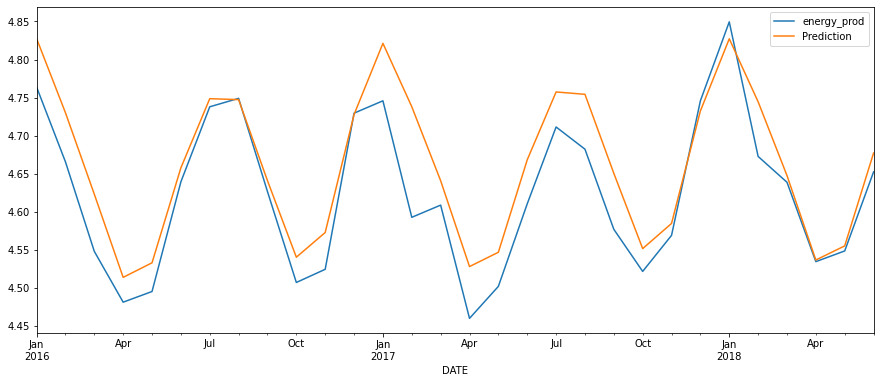

In [32]:
pd.concat([test,future_forecast],axis=1).plot()


In [33]:
future_forecast2 = np.exp(future_forecast)


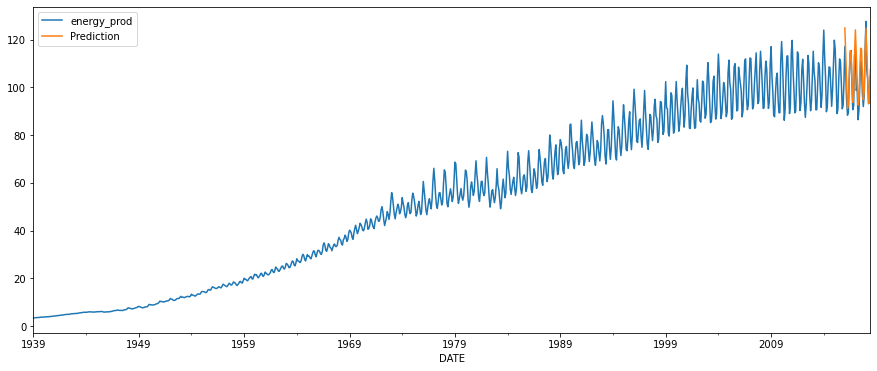

In [34]:
pd.concat([data,future_forecast2],axis=1).plot()


In [35]:
#Check r2 score for accuracy of prediction

In [36]:
from sklearn.metrics import r2_score
r2_score(np.exp(test),future_forecast2)

0.7215509238852417